In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [37]:
df = df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Train Test Split
It is always recommended to split the data into train and test before normalization and standardization.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((280, 2), (120, 2), (280,), (120,))

StarndardScalelr
Pehle hum train data se fit yani learn krwate hai ki mean std dev ky hai then transform both x_train and x_test

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Calculate mean std dev ie learn all the parameters using fit
scaler.fit(X_train)

# Transform train and test sets
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [40]:
scaler.mean_
# As you can see now scaler knows the means of both columns

array([3.78642857e+01, 6.98071429e+04])

In [41]:
# Now the problem with StandardScaler is that it takes data frame but returns numpy array
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)
x_train_scaled

,0,1
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [42]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [43]:
np.round(x_train_scaled.describe(), 1)
# As you can see mean = 0 and std Dev = 1

,0,1
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


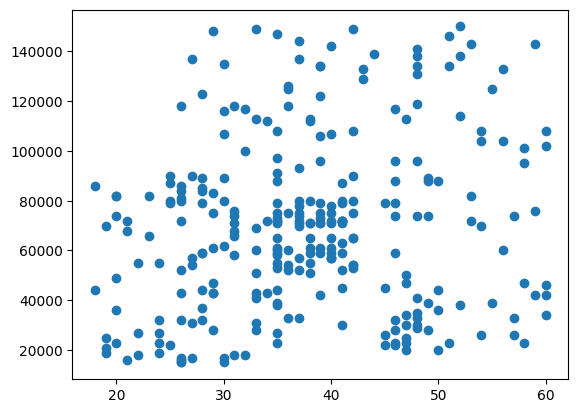

In [44]:
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])

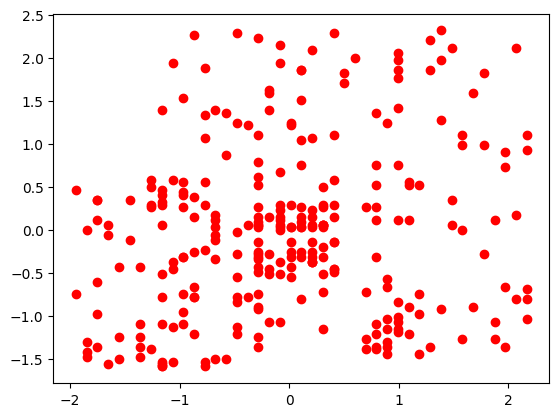

In [47]:
plt.scatter(x_train_scaled[0], x_train_scaled[1], color='red')
# As you can see there is no difference btw both graphs rather only the scale has been changed


In [ ]:
# See scaling is imp as it doesnt ched chad with data and for certain algorithms like Logistic Regression accuracy is increased tremendously on scaled data but for some algorithms like decision tree it doesn't affect the result.
# Ultimately using scaled data acha hi krega khrab toh nhi krega for sure.

<img src="images/scaling.png" alt="Boxplot Explanation" width="600">
